### Importação dos dados



In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()
loja2.head()
loja3.head()
loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


In [11]:
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados.columns


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')

#1. Análise do faturamento



In [12]:
faturamento = dados.groupby('Loja')['Preço'].sum()



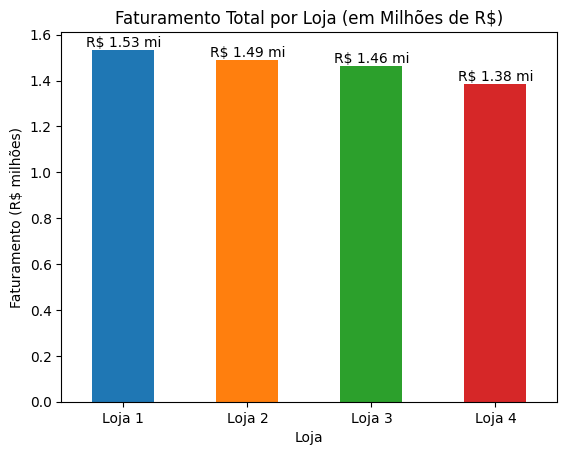

In [33]:
# Converter faturamento para milhões
faturamento_milhoes = faturamento / 1_000_000

cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.figure()
ax = faturamento_milhoes.plot(
    kind='bar',
    color=cores
)

plt.title('Faturamento Total por Loja (em Milhões de R$)')
plt.ylabel('Faturamento (R$ milhões)')
plt.xlabel('Loja')
plt.xticks(rotation=0)

# Inserir valores nas barras
for i, valor in enumerate(faturamento_milhoes):
    ax.text(
        i,
        valor,
        f'R$ {valor:.2f} mi',
        ha='center',
        va='bottom'
    )

plt.show()


# 2. Vendas por Categoria

In [19]:
vendas_categoria = (
    dados.groupby(['Loja', 'Categoria do Produto'])
    .size()
    .reset_index(name='Total de Vendas')
)


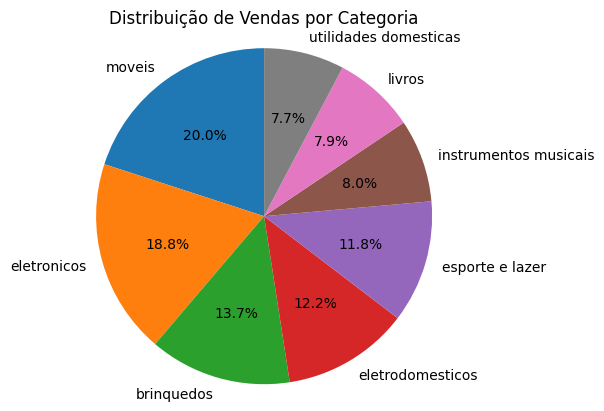

In [32]:
# Contagem de vendas por categoria
vendas_categoria = dados['Categoria do Produto'].value_counts()

plt.figure()
plt.pie(
    vendas_categoria,
    labels=vendas_categoria.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')  # Garante formato circular
plt.show()


# 3. Média de Avaliação das Lojas


In [16]:
avaliacao_media = dados.groupby('Loja')['Avaliação da compra'].mean()

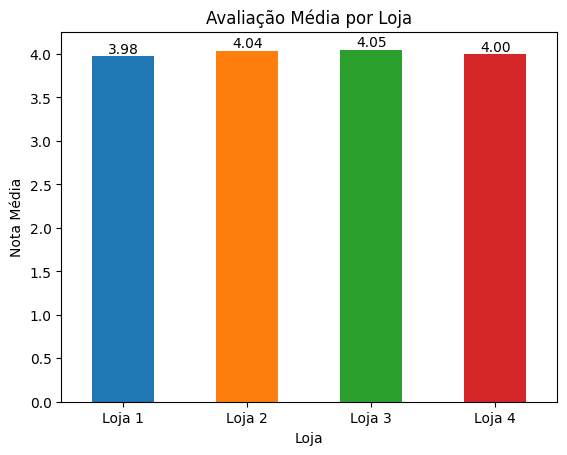

In [24]:
plt.figure()
ax = avaliacao_media.plot(
    kind='bar',
    color=cores
)

plt.title('Avaliação Média por Loja')
plt.ylabel('Nota Média')
plt.xlabel('Loja')
plt.xticks(rotation=0)

for i, valor in enumerate(avaliacao_media):
    ax.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.show()


# 4. Produtos Mais e Menos Vendidos

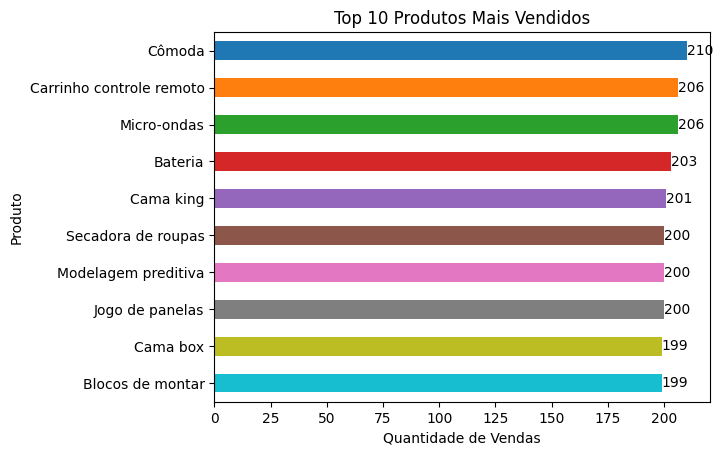

In [29]:
# Top 10 produtos mais vendidos (ordem decrescente)
top_produtos = dados['Produto'].value_counts().head(10)

plt.figure()
ax = top_produtos.plot(
    kind='barh',
    color=plt.cm.tab10.colors
)

# Inverter o eixo Y para o mais vendido ficar no topo
ax.invert_yaxis()

plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')

# Inserir valores nas barras
for i, valor in enumerate(top_produtos):
    ax.text(valor, i, str(valor), va='center')

plt.show()



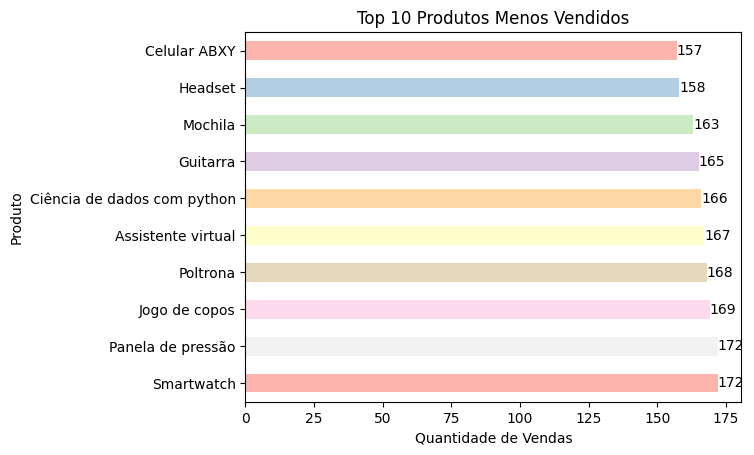

In [31]:
# 10 produtos menos vendidos (ordem crescente)
menos_produtos = (
    dados['Produto']
    .value_counts()
    .sort_values(ascending=True)
    .head(10)
)

plt.figure()
ax = menos_produtos.plot(
    kind='barh',
    color=plt.cm.Pastel1.colors
)

# Inverter eixo Y para o menos vendido ficar no topo
ax.invert_yaxis()

plt.title('Top 10 Produtos Menos Vendidos')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')

# Inserir valores nas barras
for i, valor in enumerate(menos_produtos):
    ax.text(valor, i, str(valor), va='center')

plt.show()



# 5. Frete Médio por Loja

In [14]:
frete_medio = dados.groupby('Loja')['Frete'].mean()

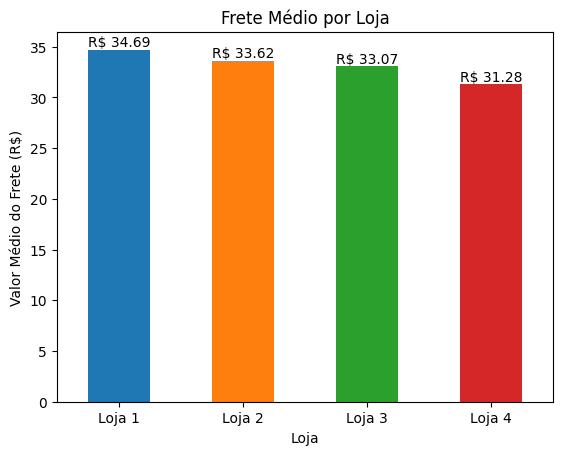

In [27]:
plt.figure()
ax = frete_medio.plot(
    kind='bar',
    color=cores
)

plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)

for i, valor in enumerate(frete_medio):
    ax.text(i, valor, f'R$ {valor:.2f}', ha='center', va='bottom')

plt.show()



# 6. DISTRIBUIÇÃO NACIONAL

In [36]:
# Carregar mapa do Brasil
url_mapa = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url_mapa)

In [37]:
# Converter DataFrame para GeoDataFrame
gdf_dados = gpd.GeoDataFrame(
    dados,
    geometry=gpd.points_from_xy(dados['lon'], dados['lat']),
    crs="EPSG:4326"
)


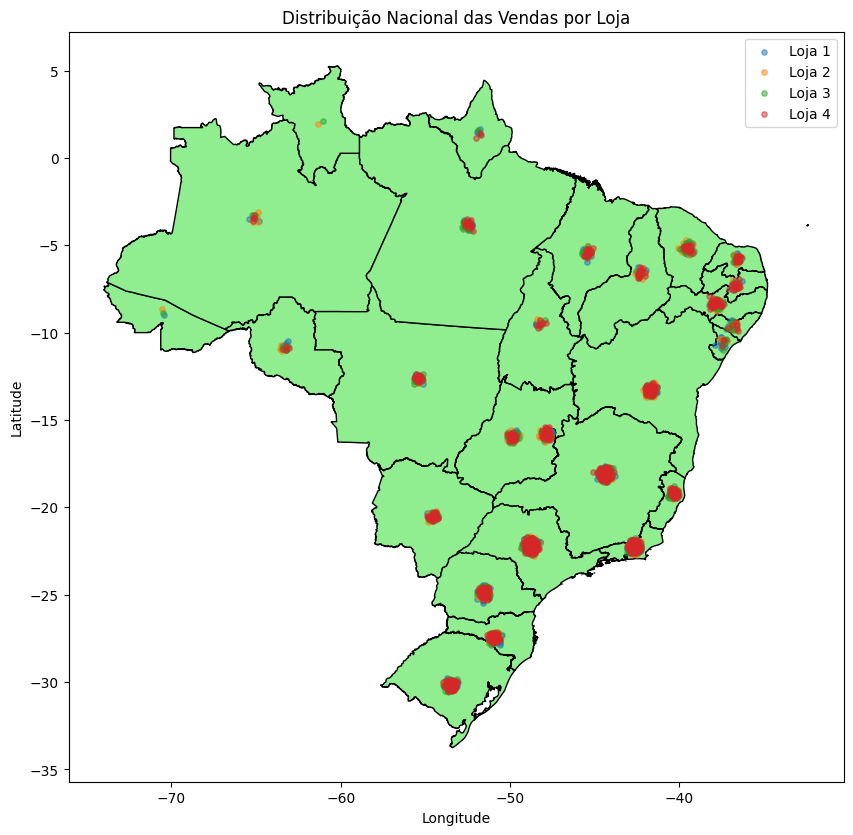

In [46]:
import numpy as np

# Criar cópias com jitter
gdf_dados['lat_jitter'] = gdf_dados['lat'] + np.random.normal(0, 0.15, size=len(gdf_dados))
gdf_dados['lon_jitter'] = gdf_dados['lon'] + np.random.normal(0, 0.15, size=len(gdf_dados))

fig, ax = plt.subplots(figsize=(10, 10))

# Mapa do Brasil
brasil.plot(
    ax=ax,
    color='lightgreen',
    edgecolor='black'
)

cores = {
    'Loja 1': 'tab:blue',
    'Loja 2': 'tab:orange',
    'Loja 3': 'tab:green',
    'Loja 4': 'tab:red'
}

for loja, cor in cores.items():
    subset = gdf_dados[gdf_dados['Loja'] == loja]
    ax.scatter(
        subset['lon_jitter'],
        subset['lat_jitter'],
        color=cor,
        alpha=0.5,
        s=15,
        label=loja
    )

plt.title('Distribuição Nacional das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

